# Data Collection

Collecting the data from the airline website [Skytrax](https://www.airlinequality.com/airport-reviews/auckland-airport/). I collected the data about airline rating, seat ratings and 
lounge experience rating.

In [1]:
#Imports
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
#Create emplty list to collect all reviews, rating stars, collect data, review from  the countries
reviews = []
stars = []
date = []
country = []

In [3]:
for i in range(1, 100):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 30
Error on page 31
Error on page 31
Error on page 33
Error on page 34


In [4]:
len(reviews)

3484

In [5]:
len(country)

3484

In [6]:
len(date)

3484

In [7]:
len(country)

3484

In [8]:
len(stars)


3583

In [9]:
# All arrays must be of the same length
stars=stars[:3484]

In [10]:
BA = pd.DataFrame({"reviews":reviews,"stars":stars,"date":date,"country":country})

In [11]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  Would happily fly them agai...   
1  Not Verified |  Flew premium, only worth the e...   
2  ✅ Trip Verified |  First our morning flight wa...   

                           stars                date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5      2nd March 2023   United States  
1                             10      2nd March 2023  United Kingdom  
2                              4  28th February 2023          Canada

In [12]:
BA.shape

(3484, 4)

In [13]:
#Exporting Data
import os
cwd = os.getcwd()  #The CWD is the directory from which the Python script is being executed.
BA.to_csv(cwd + "/BA_reviews.csv")

# Data Cleaning

In [14]:
import re

1.import re is a Python statement that imports the re module. The re module is a built-in module in Python that provides support for regular expressions. Regular expressions are a powerful way of pattern matching and manipulating text.

2.Once the re module is imported, you can use its functions and classes to perform various operations on strings, such as searching for patterns, replacing text, splitting strings, and more.

In [15]:
BA = pd.read_csv(cwd + "/BA_reviews.csv", index_col=0)

In [16]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  Would happily fly them agai...   
1  Not Verified |  Flew premium, only worth the e...   
2  ✅ Trip Verified |  First our morning flight wa...   

                           stars                date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5      2nd March 2023   United States  
1                             10      2nd March 2023  United Kingdom  
2                              4  28th February 2023          Canada

In [17]:
BA['verified'] = BA.reviews.str.contains("Trip Verified")

In [18]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  Would happily fly them agai...   
1  Not Verified |  Flew premium, only worth the e...   
2  ✅ Trip Verified |  First our morning flight wa...   

                           stars                date         country  verified  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5      2nd March 2023   United States      True  
1                             10      2nd March 2023  United Kingdom     False  
2                              4  28th February 2023          Canada      True

#.strip() is a string method in Python that removes a set of characters from the beginning and end of a string

In [19]:
reviews_data = BA.reviews.str.strip("✅ Trip Verified |") 

In [20]:
#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = " ".join(rev)
    corpus.append(rev)

In [21]:
# add the corpus to the original dataframe

BA['corpus'] = corpus

In [22]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  Would happily fly them agai...   
1  Not Verified |  Flew premium, only worth the e...   
2  ✅ Trip Verified |  First our morning flight wa...   

                           stars                date         country  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5      2nd March 2023   United States   
1                             10      2nd March 2023  United Kingdom   
2                              4  28th February 2023          Canada   

   verified                                             corpus  
0      True  would happily fly them again i had a personal ...  
1     False  not verified flew premium only worth the extra...  
2      True  first our morning flight was cancelled and mov...

In [23]:
BA.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [24]:
# convert the date to datetime format
BA.date = pd.to_datetime(BA.date)
BA.date.head()

0   2023-03-02
1   2023-03-02
2   2023-02-28
3   2023-02-27
4   2023-02-27
Name: date, dtype: datetime64[ns]

In [25]:
#check for unique values
BA.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '10', '4', '1', '8', '6', '7',
       '5', '9', '2', '3', 'None'], dtype=object)

In [26]:
# remove the \t and \n from the ratings
BA.stars = BA.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
BA.drop(BA[BA.stars == 'None'].index, axis=0, inplace= True)

In [27]:
BA.stars.unique()

array(['5', '10', '4', '1', '8', '6', '7', '9', '2', '3'], dtype=object)

In [28]:
BA.stars.value_counts()

1     752
2     389
3     386
8     351
10    314
9     303
7     302
5     262
4     235
6     185
Name: stars, dtype: int64

In [29]:
BA.isnull().sum()

reviews     0
stars       0
date        0
country     2
verified    0
corpus      0
dtype: int64

In [30]:
BA.dropna(inplace = True)

In [31]:
BA.isnull().sum()

reviews     0
stars       0
date        0
country     0
verified    0
corpus      0
dtype: int64

In [32]:
BA.shape

(3477, 6)

In [33]:
BA.head(2)

reviews stars       date  \
0  ✅ Trip Verified |  Would happily fly them agai...     5 2023-03-02   
1  Not Verified |  Flew premium, only worth the e...    10 2023-03-02   

          country  verified                                             corpus  
0   United States      True  would happily fly them again i had a personal ...  
1  United Kingdom     False  not verified flew premium only worth the extra...

In [34]:
BA.reset_index(drop=True)

reviews stars       date  \
0     ✅ Trip Verified |  Would happily fly them agai...     5 2023-03-02   
1     Not Verified |  Flew premium, only worth the e...    10 2023-03-02   
2     ✅ Trip Verified |  First our morning flight wa...     4 2023-02-28   
3     ✅ Trip Verified |  Although it was a bit uncom...     1 2023-02-27   
4     ✅ Trip Verified |  Boarding was decently organ...     8 2023-02-27   
...                                                 ...   ...        ...   
3472  Flew LHR - VIE return operated by bmi but BA a...     7 2012-08-29   
3473  LHR to HAM. Purser addresses all club passenge...     1 2012-08-28   
3474  My son who had worked for British Airways urge...     9 2011-10-12   
3475  London City-New York JFK via Shannon on A318 b...     8 2011-10-11   
3476  SIN-LHR BA12 B747-436 First Class. Old aircraf...    10 2011-10-09   

             country  verified  \
0      United States      True   
1     United Kingdom     False   
2             Canada      True   
3     United Kingdom      True   
4            Belgium      True   
...              ...       ...   
3472  United Kingdom     False   
3473  United Kingdom     False   
3474  United Kingdom     False   
3475   United States     False   
3476  United Kingdom     False   

                                                 corpus  
0     would happily fly them again i had a personal ...  
1     not verified flew premium only worth the extra...  
2     first our morning flight was cancelled and mov...  
3     although it was a bit uncomfortable flight in ...  
4     boarding was decently organised the a still ha...  
...                                                 ...  
3472  flew lhr vie return operated by bmi but ba air...  
3473  lhr to ham purser addresses all club passenger...  
3474  my son who had worked for british airways urge...  
3475  london city new york jfk via shannon on a but ...  
3476  sin lhr ba b first class old aircraft with sea...  

[3477 rows x 6 columns]

In [35]:
# Export cleaned data
BA.to_csv(cwd + "/cleaned_BA_reviews.csv" )

# Exploratory Data Analysis

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [37]:
# create the dataframe
cwd = os.getcwd()
BAC = pd.read_csv(cwd + "/cleaned_BA_reviews.csv", index_col=0)
BAC = BAC.reset_index(drop=True)

In [38]:
BAC.head(3)

reviews  stars        date  \
0  ✅ Trip Verified |  Would happily fly them agai...      5  2023-03-02   
1  Not Verified |  Flew premium, only worth the e...     10  2023-03-02   
2  ✅ Trip Verified |  First our morning flight wa...      4  2023-02-28   

          country  verified                                             corpus  
0   United States      True  would happily fly them again i had a personal ...  
1  United Kingdom     False  not verified flew premium only worth the extra...  
2          Canada      True  first our morning flight was cancelled and mov...

# What is the Min, Max and Average Rating given for British Airways?

In [39]:
BAC.describe() 

stars
count  3477.000000
mean      4.838942
std       3.148684
min       1.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      10.000000

In [40]:
ratings = pd.DataFrame(BAC.stars.value_counts())
ratings

stars
1     752
2     389
3     386
8     350
10    314
9     303
7     302
5     262
4     234
6     185

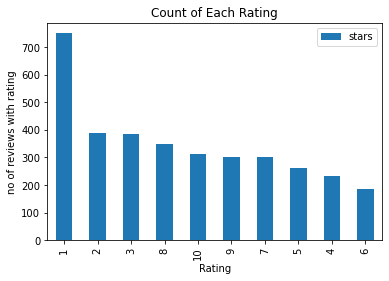

In [41]:
ratings.plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('no of reviews with rating')
plt.title('Count of Each Rating')
plt.show()

In [42]:
ratings.stars.values

array([752, 389, 386, 350, 314, 303, 302, 262, 234, 185], dtype=int64)

In [43]:
ratings.stars.sum()

3477

In [44]:
pct_values = (ratings.stars.values/ ratings.stars.sum() *100).tolist()
pct_values

[21.627840092033363,
 11.187805579522577,
 11.101524302559678,
 10.06614897900489,
 9.0307736554501,
 8.714408973252805,
 8.685648547598504,
 7.535231521426517,
 6.729939603106126,
 5.320678746045441]

In [45]:
pct_valuesratings = ['pct_values'] 

In [46]:
#resetting index as we do not want to confuse between the index and the rating values
ratings = ratings.reset_index()

In [47]:
ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
ratings

Stars  total_counts
0      1           752
1      2           389
2      3           386
3      8           350
4     10           314
5      9           303
6      7           302
7      5           262
8      4           234
9      6           185

In [48]:
len(BA.country.unique())

69

In [49]:
country = pd.DataFrame(BAC.country.value_counts().head(10)).reset_index()
country.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [50]:
country

country  total_reviews
0  United Kingdom           2217
1   United States            362
2       Australia            149
3          Canada            108
4         Germany             59
5    South Africa             38
6     Switzerland             37
7         Ireland             37
8     Netherlands             31
9       Singapore             27

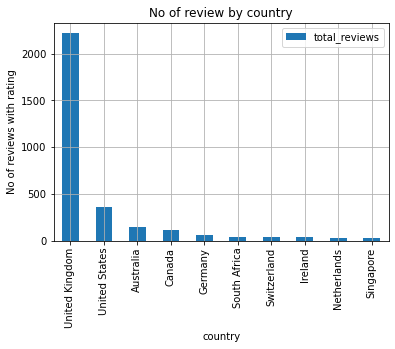

In [51]:
country.plot(kind = 'bar', x= 'country',grid = True)
plt.ylabel('No of reviews with rating')
plt.title('No of review by country')
plt.show()

# Which Country Provides Highest Rating?

In [52]:
country_rating = pd.DataFrame(BAC.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [53]:
country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
country_rating

country  avg_rating
0   Saint Kitts and Nevis        10.0
1                    Laos        10.0
2                    Oman        10.0
3      Dominican Republic         9.0
4                Botswana         8.5
..                    ...         ...
64                Bermuda         1.0
65                 Panama         1.0
66                Bahrain         1.0
67              Indonesia         1.0
68             Luxembourg         1.0

[69 rows x 2 columns]

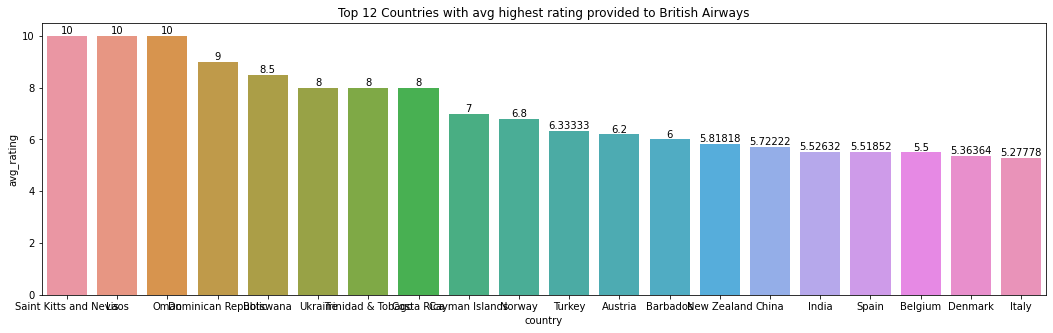

In [54]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=country_rating.head(20))
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")
plt.show()

# Time Series Analysis

In [55]:
BAC['date'] = pd.to_datetime(BAC['date'])

# Filter the data to include only the latest 2 years
latest_date = BAC['date'].max()
two_years_ago = latest_date - dt.timedelta(days=365*5)
BAC = BAC[BAC['date'] >= two_years_ago]

# Create the plot
fig = px.line(BAC, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

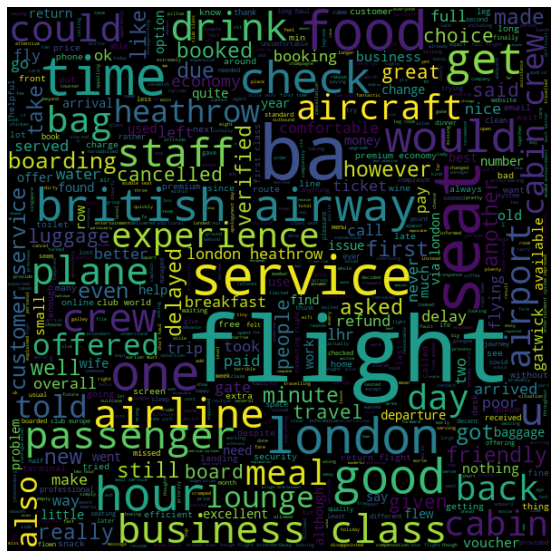

In [56]:
import nltk
from nltk.corpus import stopwords

# Start with one review:
reviews = " ".join(BAC.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=700, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

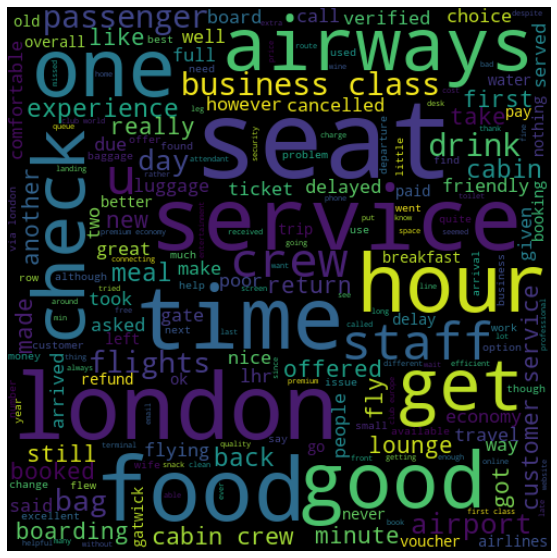

In [57]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(BAC.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=200, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Frequency

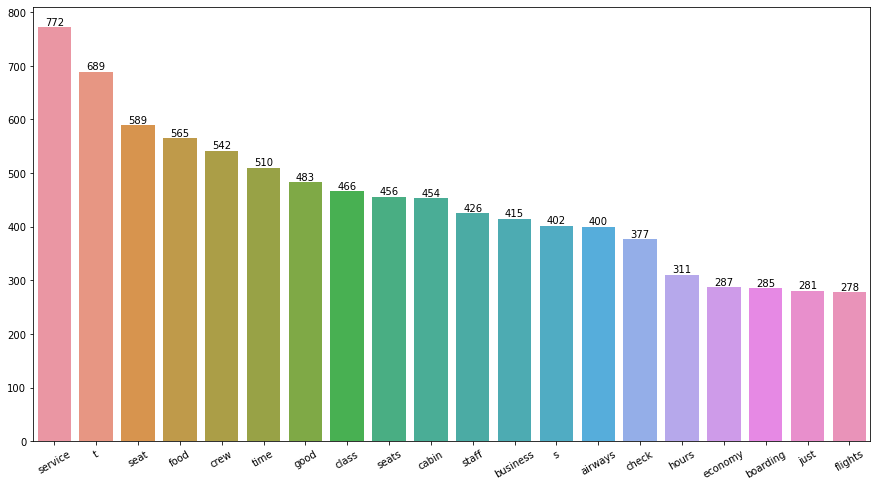

In [58]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
re_words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in re_words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.show()

# Word Frequency with N-gram

<AxesSubplot:>

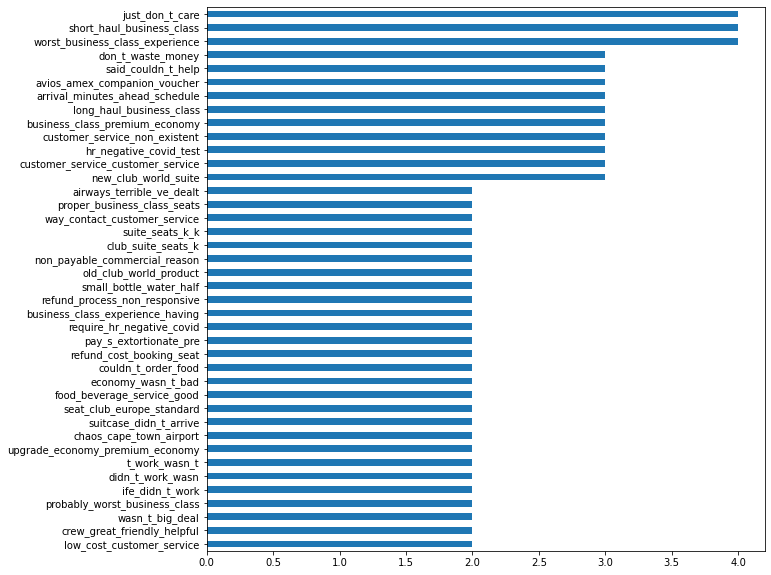

In [59]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(BAC.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [60]:
ratings_1_3 = BAC[BAC.stars.isin([1,2,3])]
ratings_4_6 = BAC[BAC.stars.isin([4,5,6])]
ratings_7_10 = BAC[BAC.stars.isin([7,8,9,10])]

<AxesSubplot:>

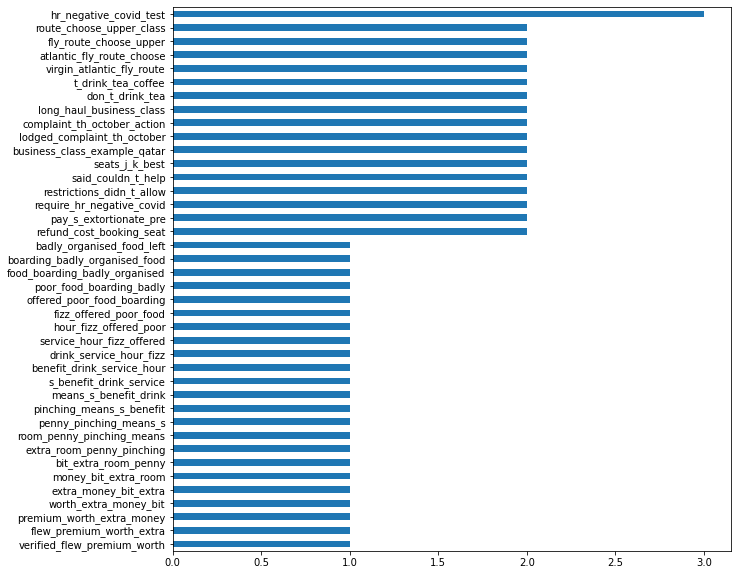

In [61]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

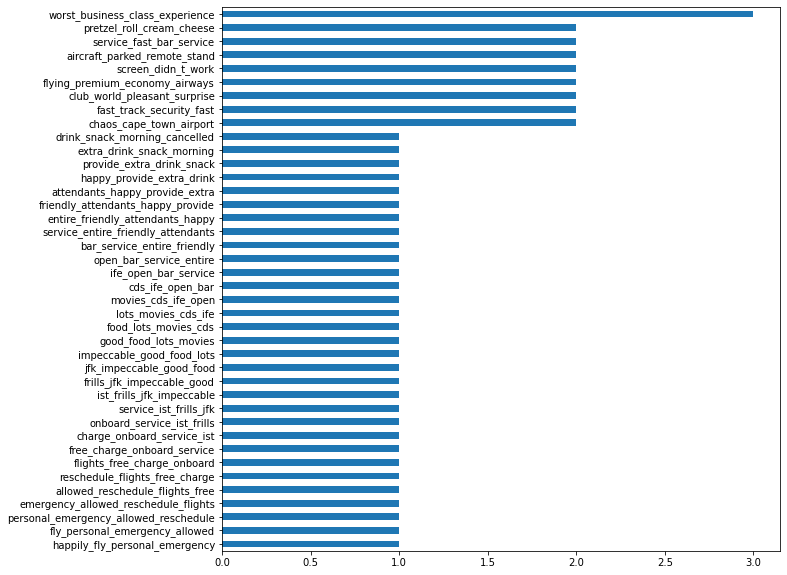

In [62]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

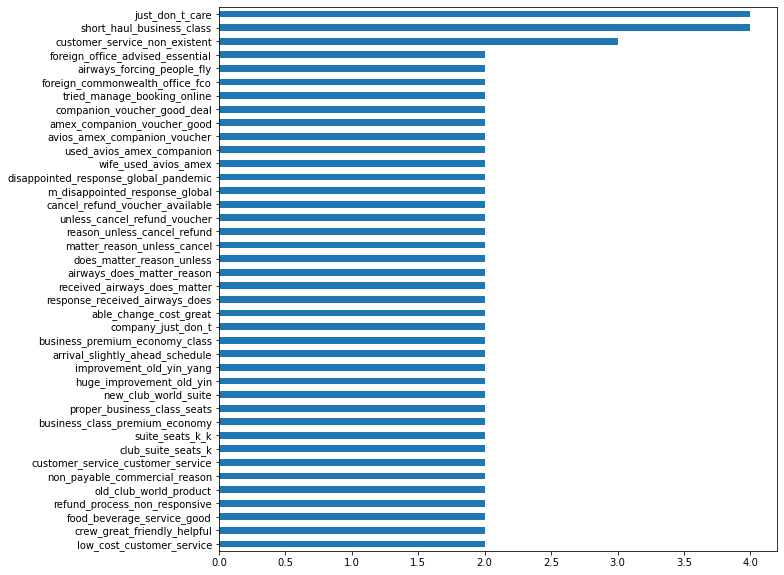

In [63]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [64]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
BAC['polarity'] = 0

for i in range(len(BAC.corpus)):
    sent= TextBlob(BAC.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    BAC['polarity'][i] = polarity

In [65]:
# let's see how many texts are with positive comments

print(f"{BAC[(BAC['polarity'] >-0.2) & (BAC['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{BAC[(BAC['polarity'] >-0.1) & (BAC['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

1063 number of reviews between -0.2 and 0.2 polarity score
1063 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [74]:
%%capture
import nltk

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
BAC['label'] = 0
    
for i in range(len(BAC.corpus)):
    
    score = analyzer.polarity_scores(BAC.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        BAC['label'][i] = 1
        #print("1st")
    elif score < 0:
        BAC['label'][i] = -1
        #print("2nd")
    else:
        BAC['label'][i] = 0

In [73]:
BAC.label.value_counts()

 1    563
-1    469
 0     31
Name: label, dtype: int64